# Spotify Data: Popular Hip-Hop Artists and Tracks - EDA

**Dataset Description:**
This dataset contains approximately 500 entries showcasing the vibrant realm of hip-hop music on Spotify, including track details, artist information, and popularity metrics.

**Objective:** Perform comprehensive exploratory data analysis to understand popularity trends, artist patterns, and track characteristics.

## 1. Setup and Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import pearsonr, spearmanr

# Configure settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

## 2. Question 1: Load Dataset and Check Data Quality

In [2]:
# Load the dataset
# Note: Download from https://www.kaggle.com/datasets/sanjanchaudhari/spotify-dataset

df = pd.read_csv(r'D:\\MachineLearning\\Exploratory_data_analysis\\data\\spotify.csv')

print(f"\nDataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")


Dataset Shape: (440, 5)
Rows: 440
Columns: 5


In [3]:
# Display first few rows
df.head(10)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
5,Drake,God's Plan,87,198973,6DCZcSspjsKoFjzjrWoCdn
6,Drake,Passionfruit,86,298940,5mCPDVBb16L4XQwDdbRUpz
7,Travis Scott,MELTDOWN (feat. Drake),86,246133,67nepsnrcZkowTxMWigSbb
8,Drake,Fair Trade (with Travis Scott),85,291175,40iJIUlhi6renaREYGeIDS
9,Drake,Rich Flex,85,239359,1bDbXMyjaUIooNwFE9wn0N


In [4]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [5]:
# Statistical summary
df.describe()

,Popularity,Duration (ms)
count,440.00,440.00
mean,75.74,206810.04
std,9.89,53576.93
min,29.00,81666.00
25%,70.00,172778.50
50%,77.00,201866.00
75%,83.00,235119.75
max,97.00,501648.00


### Data Quality Assessment

In [7]:
# Missing values analysis

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentage
}).sort_values('Missing_Count', ascending=False)

print("\nMissing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("\nNo missing values found!")
else:
    print(f"\nTotal missing values: {missing_df['Missing_Count'].sum()}")


Missing Values Summary:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

No missing values found!


In [9]:
# Duplicate rows analysis
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"\nRemoving {duplicates} duplicate rows...")
    df = df.drop_duplicates()
    print(f"Duplicates removed")
    print(f"New shape: {df.shape}")
else:
    print("No duplicate rows found!")

# Reset index after cleaning
df = df.reset_index(drop=True)
print("\nData quality checks complete!")


Number of duplicate rows: 27

Removing 27 duplicate rows...
Duplicates removed
New shape: (413, 5)

Data quality checks complete!


In [10]:
# Final data quality summary
print(f"\nTotal Records: {len(df):,}")
print(f"Total Features: {df.shape[1]}")
print(f"Missing Values: {df.isnull().sum().sum()}")
print(f"Duplicate Rows: {df.duplicated().sum()}")

print(f"\nUnique Artists: {df['Artist'].nunique() if 'Artist' in df.columns else 'N/A'}")
print(f"Unique Tracks: {df['Track Name'].nunique() if 'Track Name' in df.columns else 'N/A'}")


Total Records: 413
Total Features: 5
Missing Values: 0
Duplicate Rows: 0

Unique Artists: 115
Unique Tracks: 412


## 3. Question 2: Distribution of Popularity

In [11]:
# Analyze popularity distribution
print("\nPopularity Distribution Statistics ")
print(df['Popularity'].describe())

print(f"\nPopularity Range: {df['Popularity'].min()} - {df['Popularity'].max()}")
print(f"Mean Popularity: {df['Popularity'].mean():.2f}")
print(f"Median Popularity: {df['Popularity'].median():.2f}")
print(f"Standard Deviation: {df['Popularity'].std():.2f}")

# Check for skewness
skewness = df['Popularity'].skew()
kurtosis = df['Popularity'].kurtosis()
print(f"\nSkewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")


Popularity Distribution Statistics 
count   413.00
mean     75.38
std       9.79
min      29.00
25%      70.00
50%      76.00
75%      82.00
max      97.00
Name: Popularity, dtype: float64

Popularity Range: 29 - 97
Mean Popularity: 75.38
Median Popularity: 76.00
Standard Deviation: 9.79

Skewness: -0.84
Kurtosis: 1.51


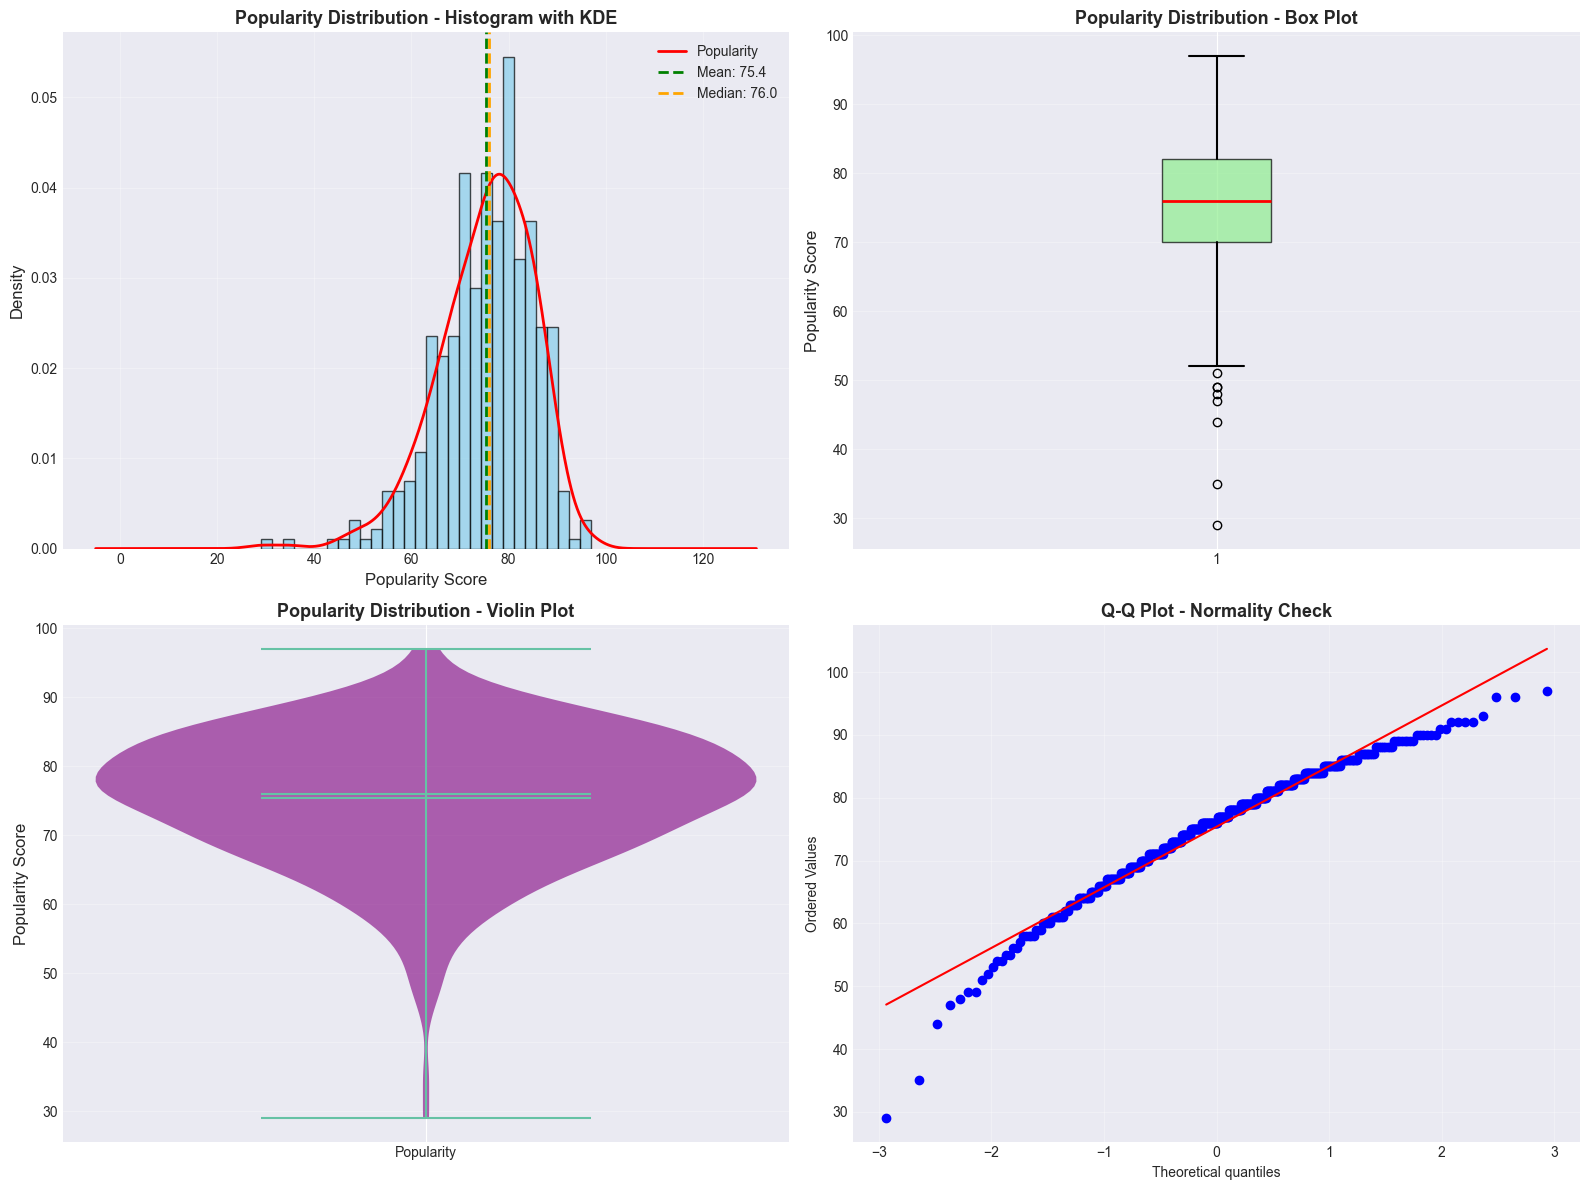


Interpretation: The popularity distribution is left-skewed (negatively skewed).


In [12]:
# Visualize popularity distribution with histogram
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram with KDE
axes[0, 0].hist(df['Popularity'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
df['Popularity'].plot(kind='kde', ax=axes[0, 0], color='red', linewidth=2)
axes[0, 0].axvline(df['Popularity'].mean(), color='green', linestyle='--', linewidth=2, 
                   label=f'Mean: {df["Popularity"].mean():.1f}')
axes[0, 0].axvline(df['Popularity'].median(), color='orange', linestyle='--', linewidth=2, 
                   label=f'Median: {df["Popularity"].median():.1f}')
axes[0, 0].set_xlabel('Popularity Score', fontsize=12)
axes[0, 0].set_ylabel('Density', fontsize=12)
axes[0, 0].set_title('Popularity Distribution - Histogram with KDE', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Box Plot
axes[0, 1].boxplot(df['Popularity'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightgreen', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2),
                   whiskerprops=dict(linewidth=1.5),
                   capprops=dict(linewidth=1.5))
axes[0, 1].set_ylabel('Popularity Score', fontsize=12)
axes[0, 1].set_title('Popularity Distribution - Box Plot', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Violin Plot
parts = axes[1, 0].violinplot([df['Popularity']], positions=[1], widths=0.7,
                              showmeans=True, showmedians=True)
for pc in parts['bodies']:
    pc.set_facecolor('purple')
    pc.set_alpha(0.6)
axes[1, 0].set_ylabel('Popularity Score', fontsize=12)
axes[1, 0].set_title('Popularity Distribution - Violin Plot', fontsize=13, fontweight='bold')
axes[1, 0].set_xticks([1])
axes[1, 0].set_xticklabels(['Popularity'])
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot (Normal distribution check)
stats.probplot(df['Popularity'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot - Normality Check', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Interpretation
if abs(skewness) < 0.5:
    skew_interpretation = "fairly symmetric"
elif skewness < 0:
    skew_interpretation = "left-skewed (negatively skewed)"
else:
    skew_interpretation = "right-skewed (positively skewed)"

print(f"\nInterpretation: The popularity distribution is {skew_interpretation}.")

## 4. Question 3: Relationship Between Popularity and Duration

In [13]:
# Convert duration from milliseconds to minutes for better readability
df['Duration_min'] = df['Duration (ms)'] / 60000

# Calculate correlation
correlation_pearson = df['Popularity'].corr(df['Duration_min'])
correlation_spearman = df['Popularity'].corr(df['Duration_min'], method='spearman')

print("\n=== Popularity vs Duration Analysis ===")
print(f"Pearson Correlation: {correlation_pearson:.4f}")
print(f"Spearman Correlation: {correlation_spearman:.4f}")

print(f"\nDuration Statistics:")
print(f"Mean: {df['Duration_min'].mean():.2f} minutes")
print(f"Median: {df['Duration_min'].median():.2f} minutes")
print(f"Range: {df['Duration_min'].min():.2f} - {df['Duration_min'].max():.2f} minutes")


=== Popularity vs Duration Analysis ===
Pearson Correlation: 0.0390
Spearman Correlation: 0.0546

Duration Statistics:
Mean: 3.44 minutes
Median: 3.36 minutes
Range: 1.36 - 8.36 minutes


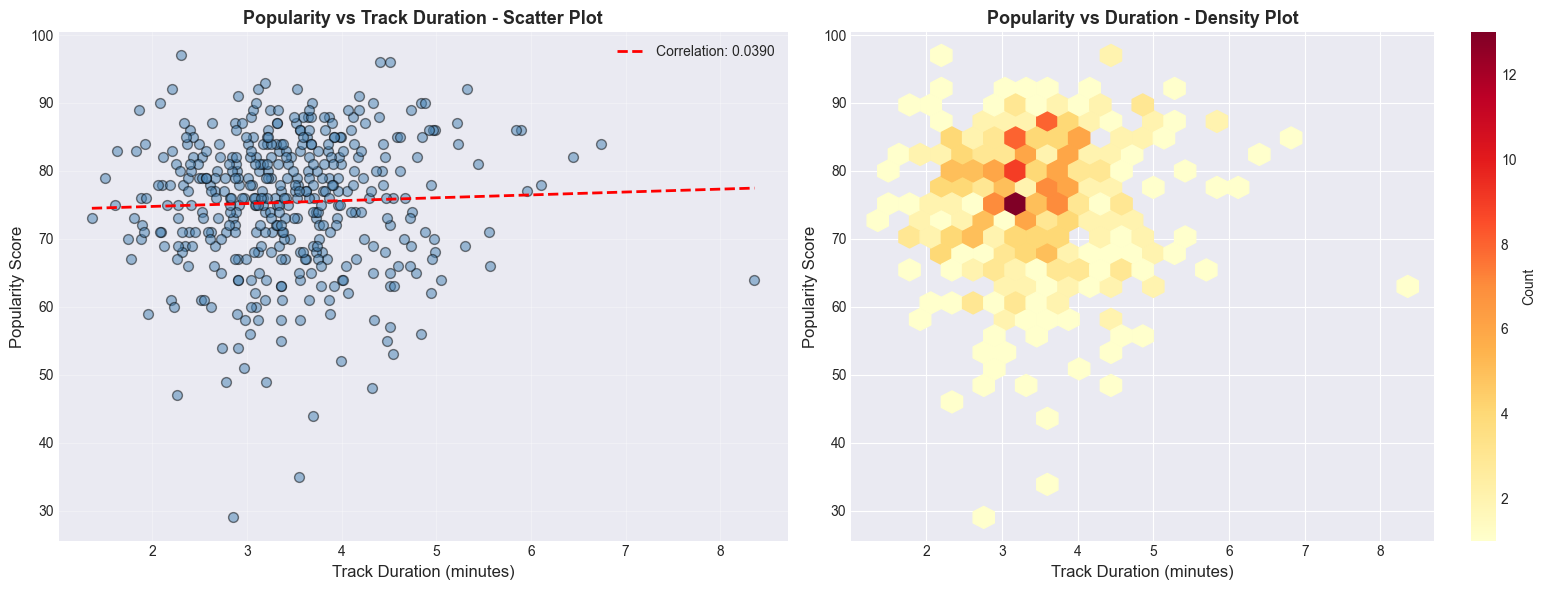


Interpretation: There is a weak positive relationship between track duration and popularity.


In [14]:
# Visualize relationship with scatter plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with regression line
axes[0].scatter(df['Duration_min'], df['Popularity'], alpha=0.5, s=50, c='steelblue', edgecolors='black')
z = np.polyfit(df['Duration_min'], df['Popularity'], 1)
p = np.poly1d(z)
axes[0].plot(df['Duration_min'].sort_values(), p(df['Duration_min'].sort_values()), 
             "r--", linewidth=2, label=f'Correlation: {correlation_pearson:.4f}')
axes[0].set_xlabel('Track Duration (minutes)', fontsize=12)
axes[0].set_ylabel('Popularity Score', fontsize=12)
axes[0].set_title('Popularity vs Track Duration - Scatter Plot', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Hexbin plot for density visualization
hb = axes[1].hexbin(df['Duration_min'], df['Popularity'], gridsize=25, cmap='YlOrRd', mincnt=1)
axes[1].set_xlabel('Track Duration (minutes)', fontsize=12)
axes[1].set_ylabel('Popularity Score', fontsize=12)
axes[1].set_title('Popularity vs Duration - Density Plot', fontsize=13, fontweight='bold')
plt.colorbar(hb, ax=axes[1], label='Count')

plt.tight_layout()
plt.show()

# Interpretation
if abs(correlation_pearson) < 0.3:
    strength = "weak"
elif abs(correlation_pearson) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

direction = "positive" if correlation_pearson > 0 else "negative"
print(f"\nInterpretation: There is a {strength} {direction} relationship between track duration and popularity.")

## 5. Question 4: Artist with Highest Number of Tracks

In [15]:
# Count tracks per artist
artist_track_counts = df['Artist'].value_counts()

print("\n=== Top 20 Artists by Track Count ===")
print(artist_track_counts.head(20))

print(f"\nArtist with most tracks: {artist_track_counts.index[0]} ({artist_track_counts.iloc[0]} tracks)")
print(f"Total unique artists: {len(artist_track_counts)}")
print(f"Average tracks per artist: {artist_track_counts.mean():.2f}")


=== Top 20 Artists by Track Count ===
Artist
Drake             17
Eminem            11
Lil Nas X         10
JAY-Z             10
21 Savage         10
Flo Rida          10
¥$                10
Timbaland         10
Ludacris          10
Travis Scott       9
Lil Baby           9
Bizarrap           8
Post Malone        8
D-Block Europe     8
Lil Uzi Vert       8
Kendrick Lamar     8
J. Cole            8
Metro Boomin       7
Cardi B            7
Ice Spice          7
Name: count, dtype: int64

Artist with most tracks: Drake (17 tracks)
Total unique artists: 115
Average tracks per artist: 3.59


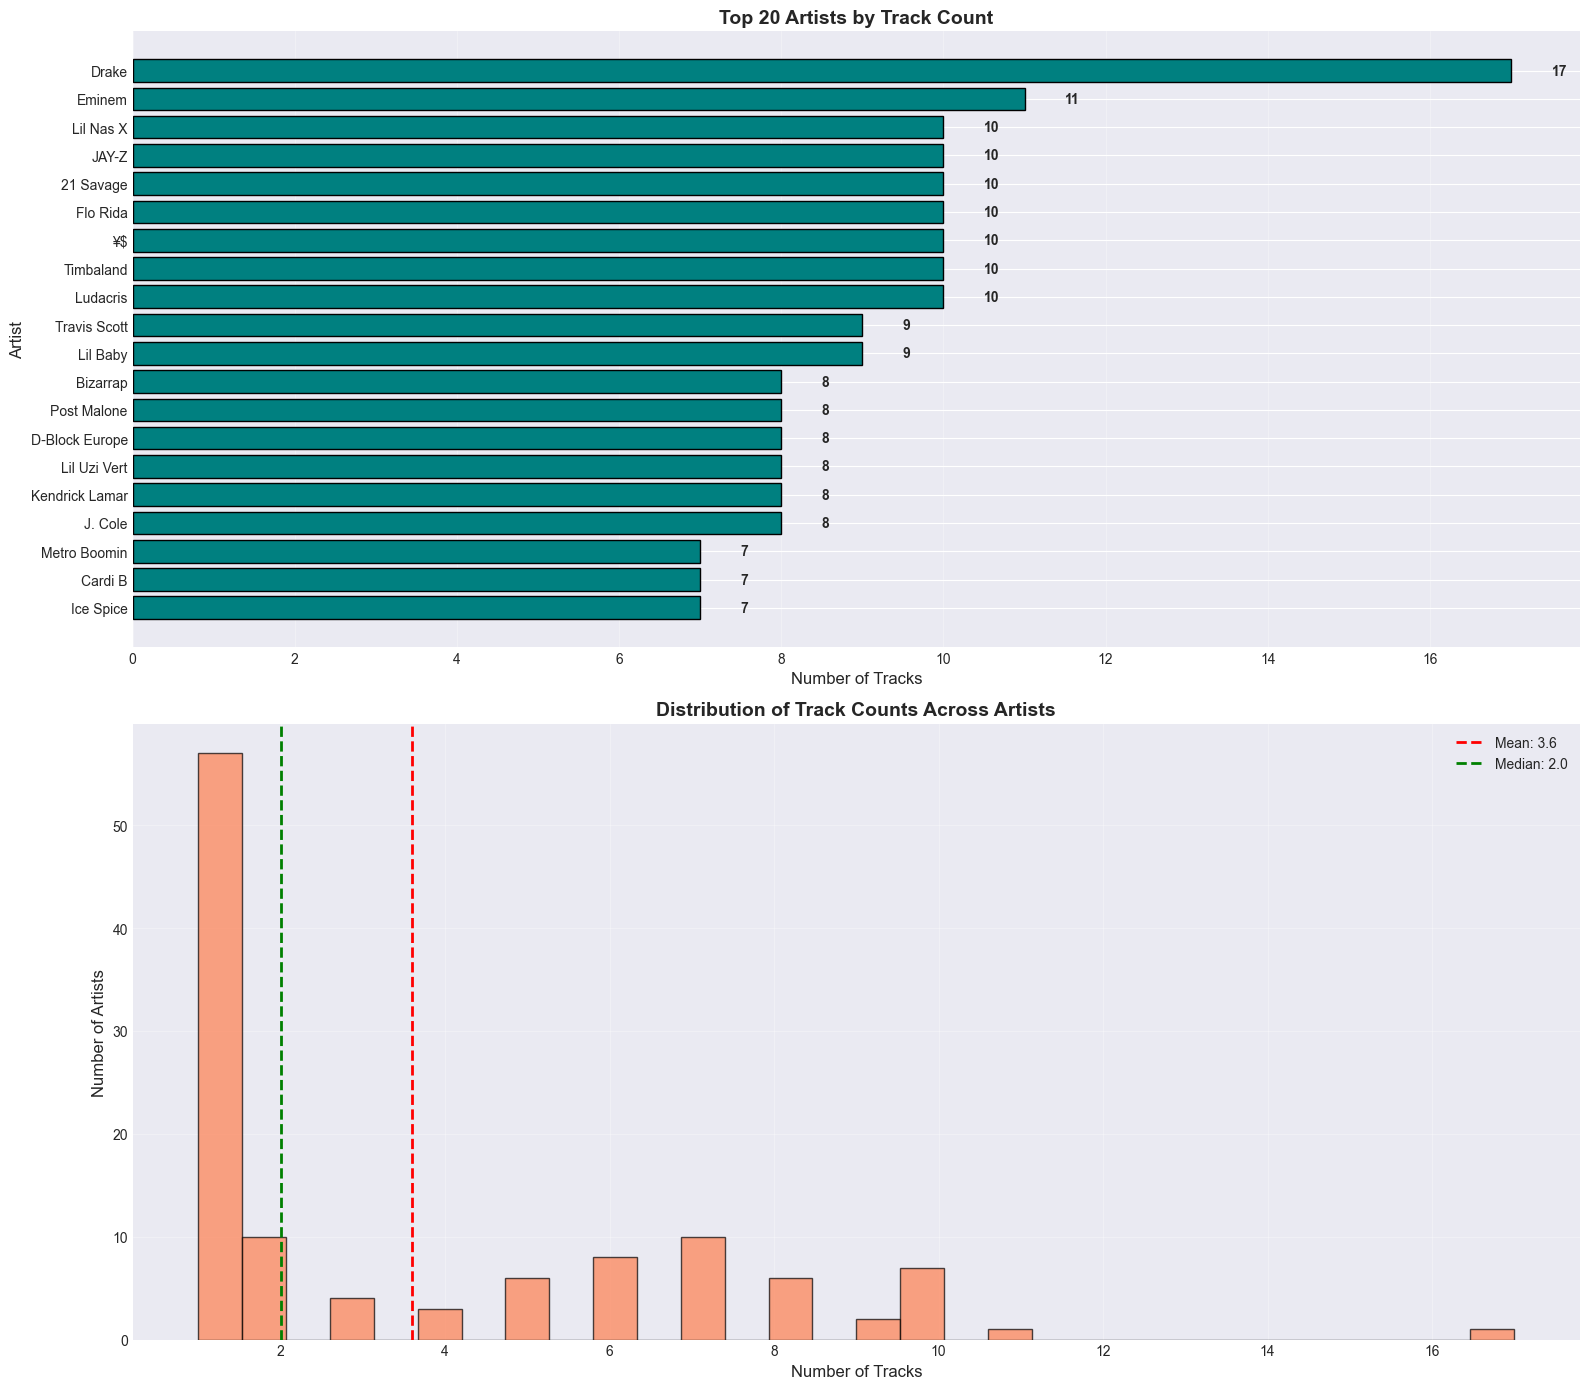

In [16]:
# Visualize with count plot
fig, axes = plt.subplots(2, 1, figsize=(16, 14))

# Top 20 artists bar chart
top_20_artists = artist_track_counts.head(20)
axes[0].barh(range(len(top_20_artists)), top_20_artists.values, color='teal', edgecolor='black')
axes[0].set_yticks(range(len(top_20_artists)))
axes[0].set_yticklabels(top_20_artists.index)
axes[0].set_xlabel('Number of Tracks', fontsize=12)
axes[0].set_ylabel('Artist', fontsize=12)
axes[0].set_title('Top 20 Artists by Track Count', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(top_20_artists.values):
    axes[0].text(v + 0.5, i, str(v), va='center', fontsize=10, fontweight='bold')

# Distribution of track counts
axes[1].hist(artist_track_counts.values, bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1].axvline(artist_track_counts.mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {artist_track_counts.mean():.1f}')
axes[1].axvline(artist_track_counts.median(), color='green', linestyle='--', linewidth=2,
                label=f'Median: {artist_track_counts.median():.1f}')
axes[1].set_xlabel('Number of Tracks', fontsize=12)
axes[1].set_ylabel('Number of Artists', fontsize=12)
axes[1].set_title('Distribution of Track Counts Across Artists', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Question 5: Top 5 Least Popular Tracks

In [17]:
# Find least popular tracks
least_popular = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity', 'Duration_min']]

print("\n=== Top 5 Least Popular Tracks ===")
print(least_popular.to_string(index=False))

# Show broader context
print("\n=== Bottom 20 Least Popular Tracks ===")
bottom_20 = df.nsmallest(20, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print(bottom_20)


=== Top 5 Least Popular Tracks ===
        Artist                    Track Name  Popularity  Duration_min
        Pressa Attachments (feat. Coi Leray)          29          2.85
 Justin Bieber                    Intentions          35          3.55
French Montana               Splash Brothers          44          3.70
      Lil Baby                 On Me - Remix          47          2.26
   Wyclef Jean     911 (feat. Mary J. Blige)          48          4.32

=== Bottom 20 Least Popular Tracks ===
             Artist                                         Track Name  \
199          Pressa                      Attachments (feat. Coi Leray)   
219   Justin Bieber                                         Intentions   
390  French Montana                                    Splash Brothers   
213        Lil Baby                                      On Me - Remix   
384     Wyclef Jean                          911 (feat. Mary J. Blige)   
395       Rick Ross                                   

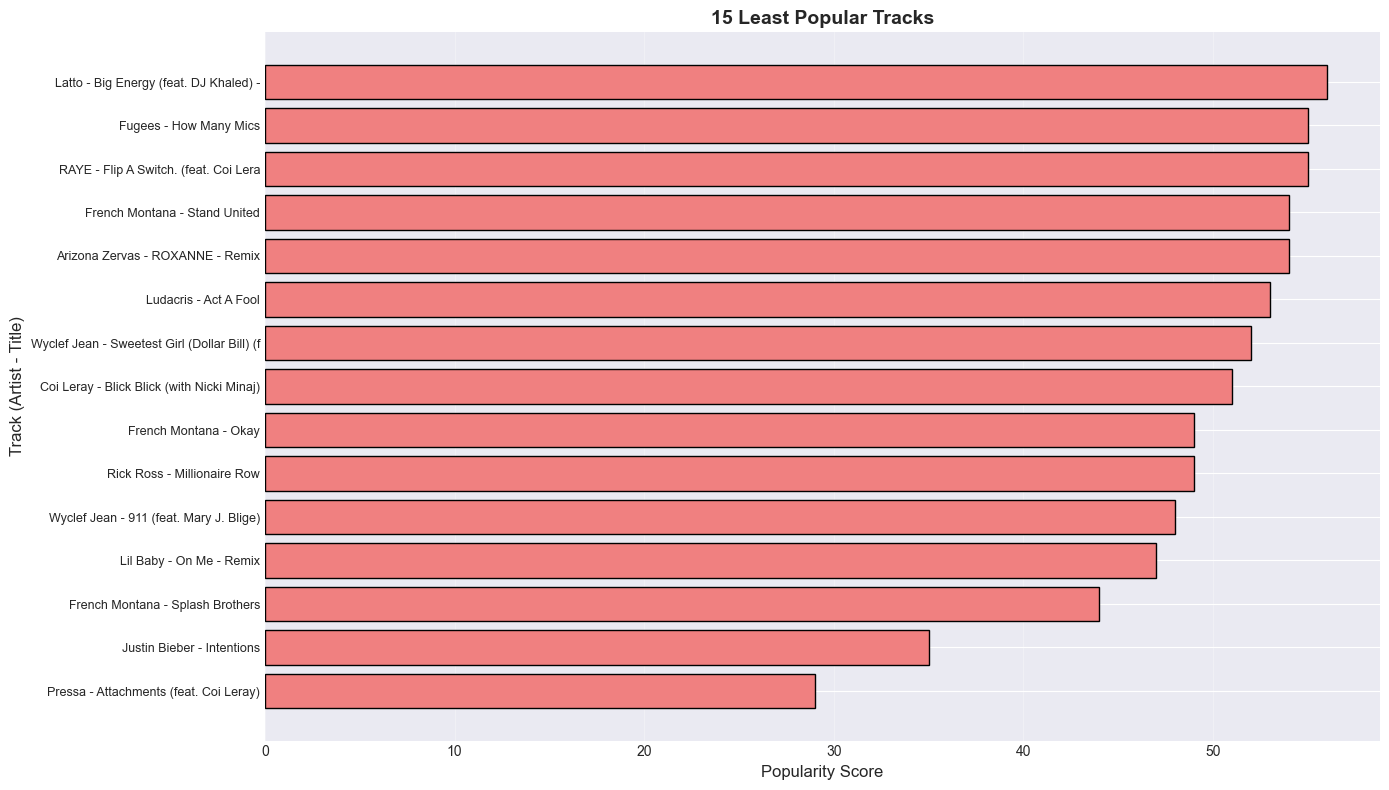

In [18]:
# Visualize least popular tracks
plt.figure(figsize=(14, 8))
bottom_15 = df.nsmallest(15, 'Popularity')
track_labels = [f"{row['Artist'][:20]} - {row['Track Name'][:30]}" 
                for _, row in bottom_15.iterrows()]

plt.barh(range(len(bottom_15)), bottom_15['Popularity'].values, 
         color='lightcoral', edgecolor='black')
plt.yticks(range(len(bottom_15)), track_labels, fontsize=9)
plt.xlabel('Popularity Score', fontsize=12)
plt.ylabel('Track (Artist - Title)', fontsize=12)
plt.title('15 Least Popular Tracks', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 7. Question 6: Top 5 Artists with Highest Average Popularity

In [19]:
# Calculate average popularity per artist
artist_avg_popularity = df.groupby('Artist').agg({
    'Popularity': ['mean', 'count', 'std', 'min', 'max']
}).round(2)

artist_avg_popularity.columns = ['Avg_Popularity', 'Track_Count', 'Std_Dev', 'Min', 'Max']
artist_avg_popularity = artist_avg_popularity.sort_values('Avg_Popularity', ascending=False)

# Filter artists with at least 3 tracks for meaningful average
top_artists_filtered = artist_avg_popularity[artist_avg_popularity['Track_Count'] >= 3]
top_5_artists = top_artists_filtered.head(5)

print("\n=== Top 5 Most Popular Artists (with ≥3 tracks) ===")
print(top_5_artists)

print(f"\nMost popular artist: {top_5_artists.index[0]}")
print(f"Average popularity: {top_5_artists['Avg_Popularity'].iloc[0]:.2f}")
print(f"Number of tracks: {int(top_5_artists['Track_Count'].iloc[0])}")


=== Top 5 Most Popular Artists (with ≥3 tracks) ===
                Avg_Popularity  Track_Count  Std_Dev  Min  Max
Artist                                                        
Travis Scott             86.56            9     5.73   77   93
¥$                       85.10           10     4.84   80   96
Post Malone              85.00            8     1.69   83   88
Kendrick Lamar           84.50            8     2.39   82   88
Metro Boomin             84.43            7     5.77   77   90

Most popular artist: Travis Scott
Average popularity: 86.56
Number of tracks: 9


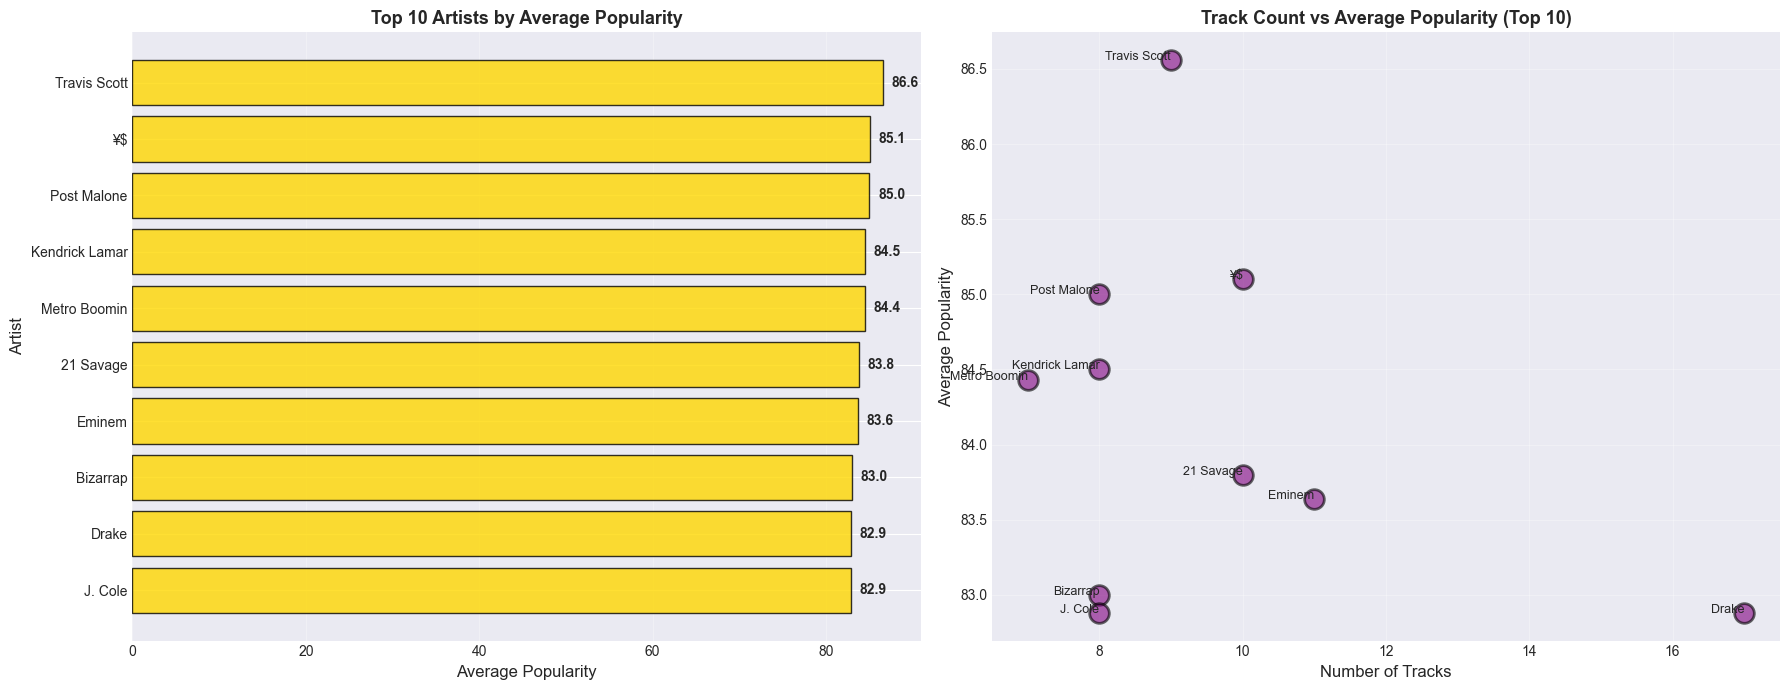

In [20]:
# Visualize top artists
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Average popularity comparison
top_10 = top_artists_filtered.head(10)
axes[0].barh(range(len(top_10)), top_10['Avg_Popularity'].values, 
             color='gold', edgecolor='black', alpha=0.8)
axes[0].set_yticks(range(len(top_10)))
axes[0].set_yticklabels(top_10.index)
axes[0].set_xlabel('Average Popularity', fontsize=12)
axes[0].set_ylabel('Artist', fontsize=12)
axes[0].set_title('Top 10 Artists by Average Popularity', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(top_10['Avg_Popularity'].values):
    axes[0].text(v + 1, i, f'{v:.1f}', va='center', fontsize=10, fontweight='bold')

# Track count vs avg popularity for top 10
axes[1].scatter(top_10['Track_Count'], top_10['Avg_Popularity'], 
                s=200, c='purple', alpha=0.6, edgecolors='black', linewidth=2)
for idx, row in top_10.iterrows():
    axes[1].annotate(idx[:15], (row['Track_Count'], row['Avg_Popularity']),
                    fontsize=9, ha='right')
axes[1].set_xlabel('Number of Tracks', fontsize=12)
axes[1].set_ylabel('Average Popularity', fontsize=12)
axes[1].set_title('Track Count vs Average Popularity (Top 10)', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Question 7: Most Popular Tracks for Top 5 Artists

In [21]:
# Get most popular track for each top 5 artist
print("\n=== Most Popular Track for Each Top 5 Artist ===")
print("="*80)

for artist in top_5_artists.index:
    artist_tracks = df[df['Artist'] == artist].nlargest(1, 'Popularity')
    for _, track in artist_tracks.iterrows():
        print(f"\nArtist: {artist}")
        print(f"Track: {track['Track Name']}")
        print(f"Popularity: {track['Popularity']}")
        print(f"Duration: {track['Duration_min']:.2f} min")
        print("-" * 80)


=== Most Popular Track for Each Top 5 Artist ===

Artist: Travis Scott
Track: FE!N (feat. Playboi Carti)
Popularity: 93
Duration: 3.19 min
--------------------------------------------------------------------------------

Artist: ¥$
Track: CARNIVAL
Popularity: 96
Duration: 4.41 min
--------------------------------------------------------------------------------

Artist: Post Malone
Track: Circles
Popularity: 88
Duration: 3.59 min
--------------------------------------------------------------------------------

Artist: Kendrick Lamar
Track: All The Stars (with SZA)
Popularity: 88
Duration: 3.87 min
--------------------------------------------------------------------------------

Artist: Metro Boomin
Track: Creepin' (with The Weeknd & 21 Savage)
Popularity: 90
Duration: 3.69 min
--------------------------------------------------------------------------------


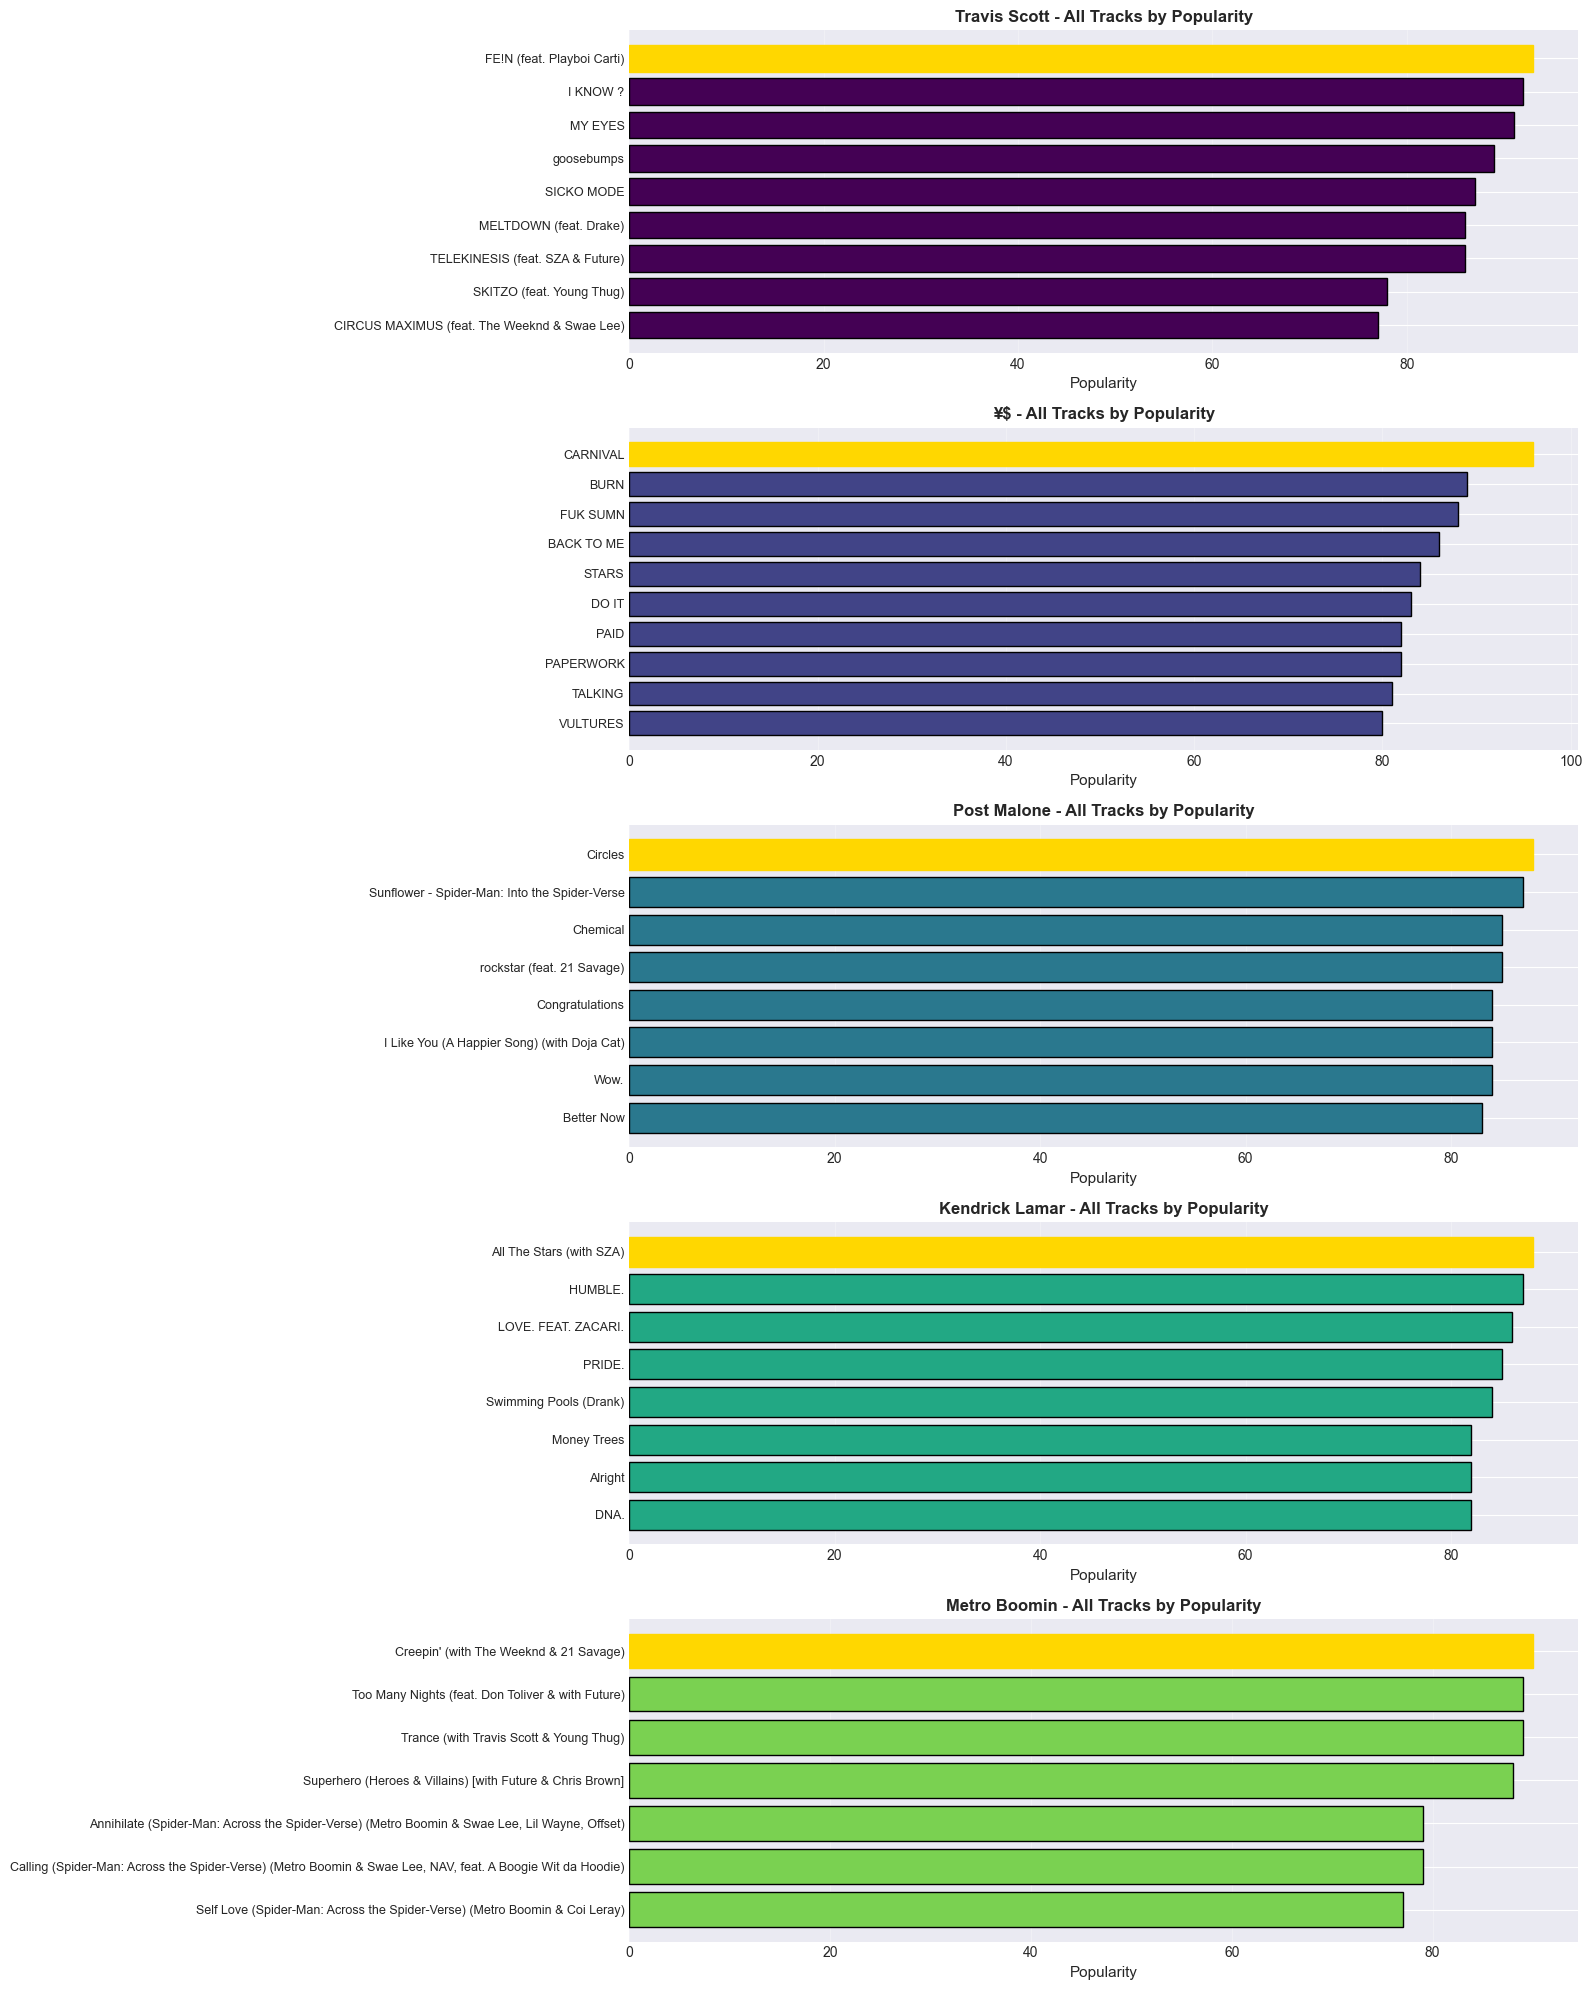

In [22]:
# Visualize all tracks for top 5 artists
fig, axes = plt.subplots(5, 1, figsize=(16, 20))

for idx, artist in enumerate(top_5_artists.index):
    artist_data = df[df['Artist'] == artist].sort_values('Popularity', ascending=False)
    
    axes[idx].barh(range(len(artist_data)), artist_data['Popularity'].values,
                   color=plt.cm.viridis(idx/5), edgecolor='black')
    axes[idx].set_yticks(range(len(artist_data)))
    axes[idx].set_yticklabels(artist_data['Track Name'].values, fontsize=9)
    axes[idx].set_xlabel('Popularity', fontsize=11)
    axes[idx].set_title(f'{artist} - All Tracks by Popularity', fontsize=12, fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(True, alpha=0.3, axis='x')
    
    # Highlight most popular
    axes[idx].get_children()[0].set_color('gold')

plt.tight_layout()
plt.show()

## 9. Question 8: Pair Plot for Numerical Variables

In [23]:
# Select numerical columns for pair plot
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical columns for pair plot: {numerical_cols}")

# Create subset with key numerical features
key_features = ['Popularity', 'Duration_min']
# Add other numerical columns if they exist
for col in numerical_cols:
    if col not in key_features and col != 'Duration (ms)':
        key_features.append(col)
        if len(key_features) >= 4:  # Limit to 4 variables for readability
            break

pair_data = df[key_features]


Numerical columns for pair plot: ['Popularity', 'Duration (ms)', 'Duration_min']



Generating pair plot...


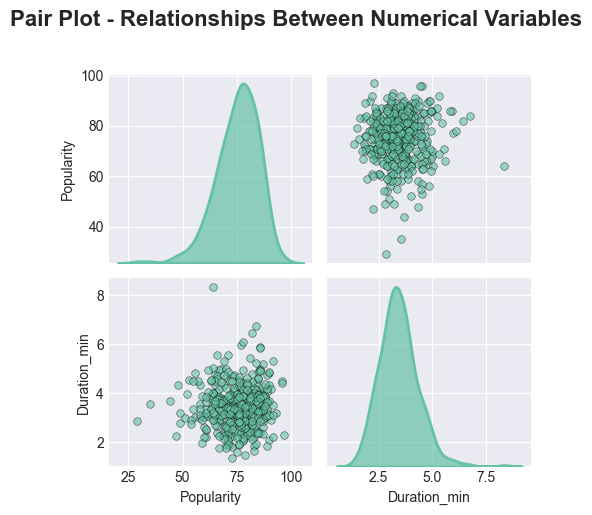


=== Correlation Matrix ===
              Popularity  Duration_min
Popularity          1.00          0.04
Duration_min        0.04          1.00


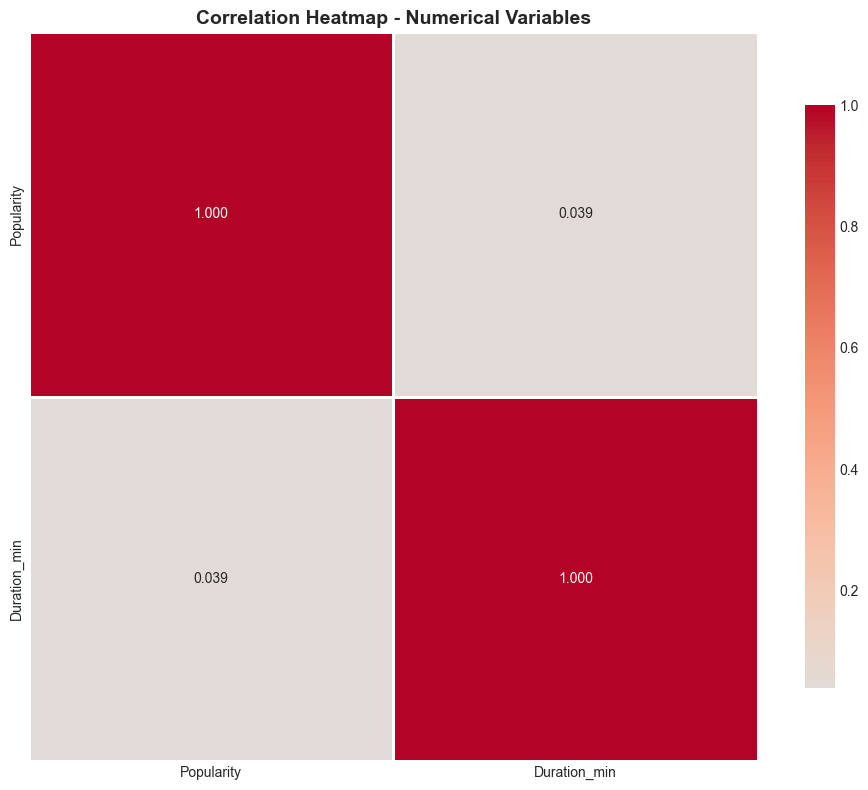

In [24]:
# Create pair plot
print("\nGenerating pair plot...")
pair_plot = sns.pairplot(pair_data, 
                         diag_kind='kde',
                         plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k'},
                         diag_kws={'alpha': 0.7, 'linewidth': 2})

pair_plot.fig.suptitle('Pair Plot - Relationships Between Numerical Variables', 
                       y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate and display correlation matrix
print("\n=== Correlation Matrix ===")
correlation_matrix = pair_data.corr()
print(correlation_matrix)

# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Numerical Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 10. Question 9: Track Duration Variation Across Artists

In [25]:
# Analyze duration variation by artist
# Focus on artists with multiple tracks
artists_with_multiple_tracks = artist_track_counts[artist_track_counts >= 3].index
df_filtered = df[df['Artist'].isin(artists_with_multiple_tracks)]

# Get top 15 artists by track count for visualization
top_15_artists_for_duration = artist_track_counts.head(15).index
df_top_15 = df[df['Artist'].isin(top_15_artists_for_duration)]

print("\n=== Duration Statistics by Artist (Top 15) ===")
duration_stats = df_top_15.groupby('Artist')['Duration_min'].agg(['mean', 'std', 'min', 'max', 'count']).round(2)
duration_stats = duration_stats.sort_values('mean', ascending=False)
print(duration_stats)


=== Duration Statistics by Artist (Top 15) ===
                mean  std  min  max  count
Artist                                    
Eminem          4.76 0.97 3.51 6.74     11
Travis Scott    4.51 1.01 3.20 6.11      9
Ludacris        4.26 0.60 3.36 5.05     10
Drake           4.03 0.90 2.48 5.96     17
JAY-Z           3.88 0.85 2.35 4.74     10
Flo Rida        3.68 0.32 3.17 4.14     10
Timbaland       3.67 0.63 2.90 4.88     10
21 Savage       3.60 0.69 2.40 4.51     10
D-Block Europe  3.40 0.77 2.39 4.95      8
¥$              3.37 1.08 1.86 4.92     10
Post Malone     3.27 0.51 2.49 3.85      8
Lil Uzi Vert    3.13 0.54 2.06 3.70      8
Bizarrap        2.96 0.46 2.20 3.58      8
Lil Baby        2.84 0.63 2.26 4.12      9
Lil Nas X       2.66 0.60 1.88 3.54     10


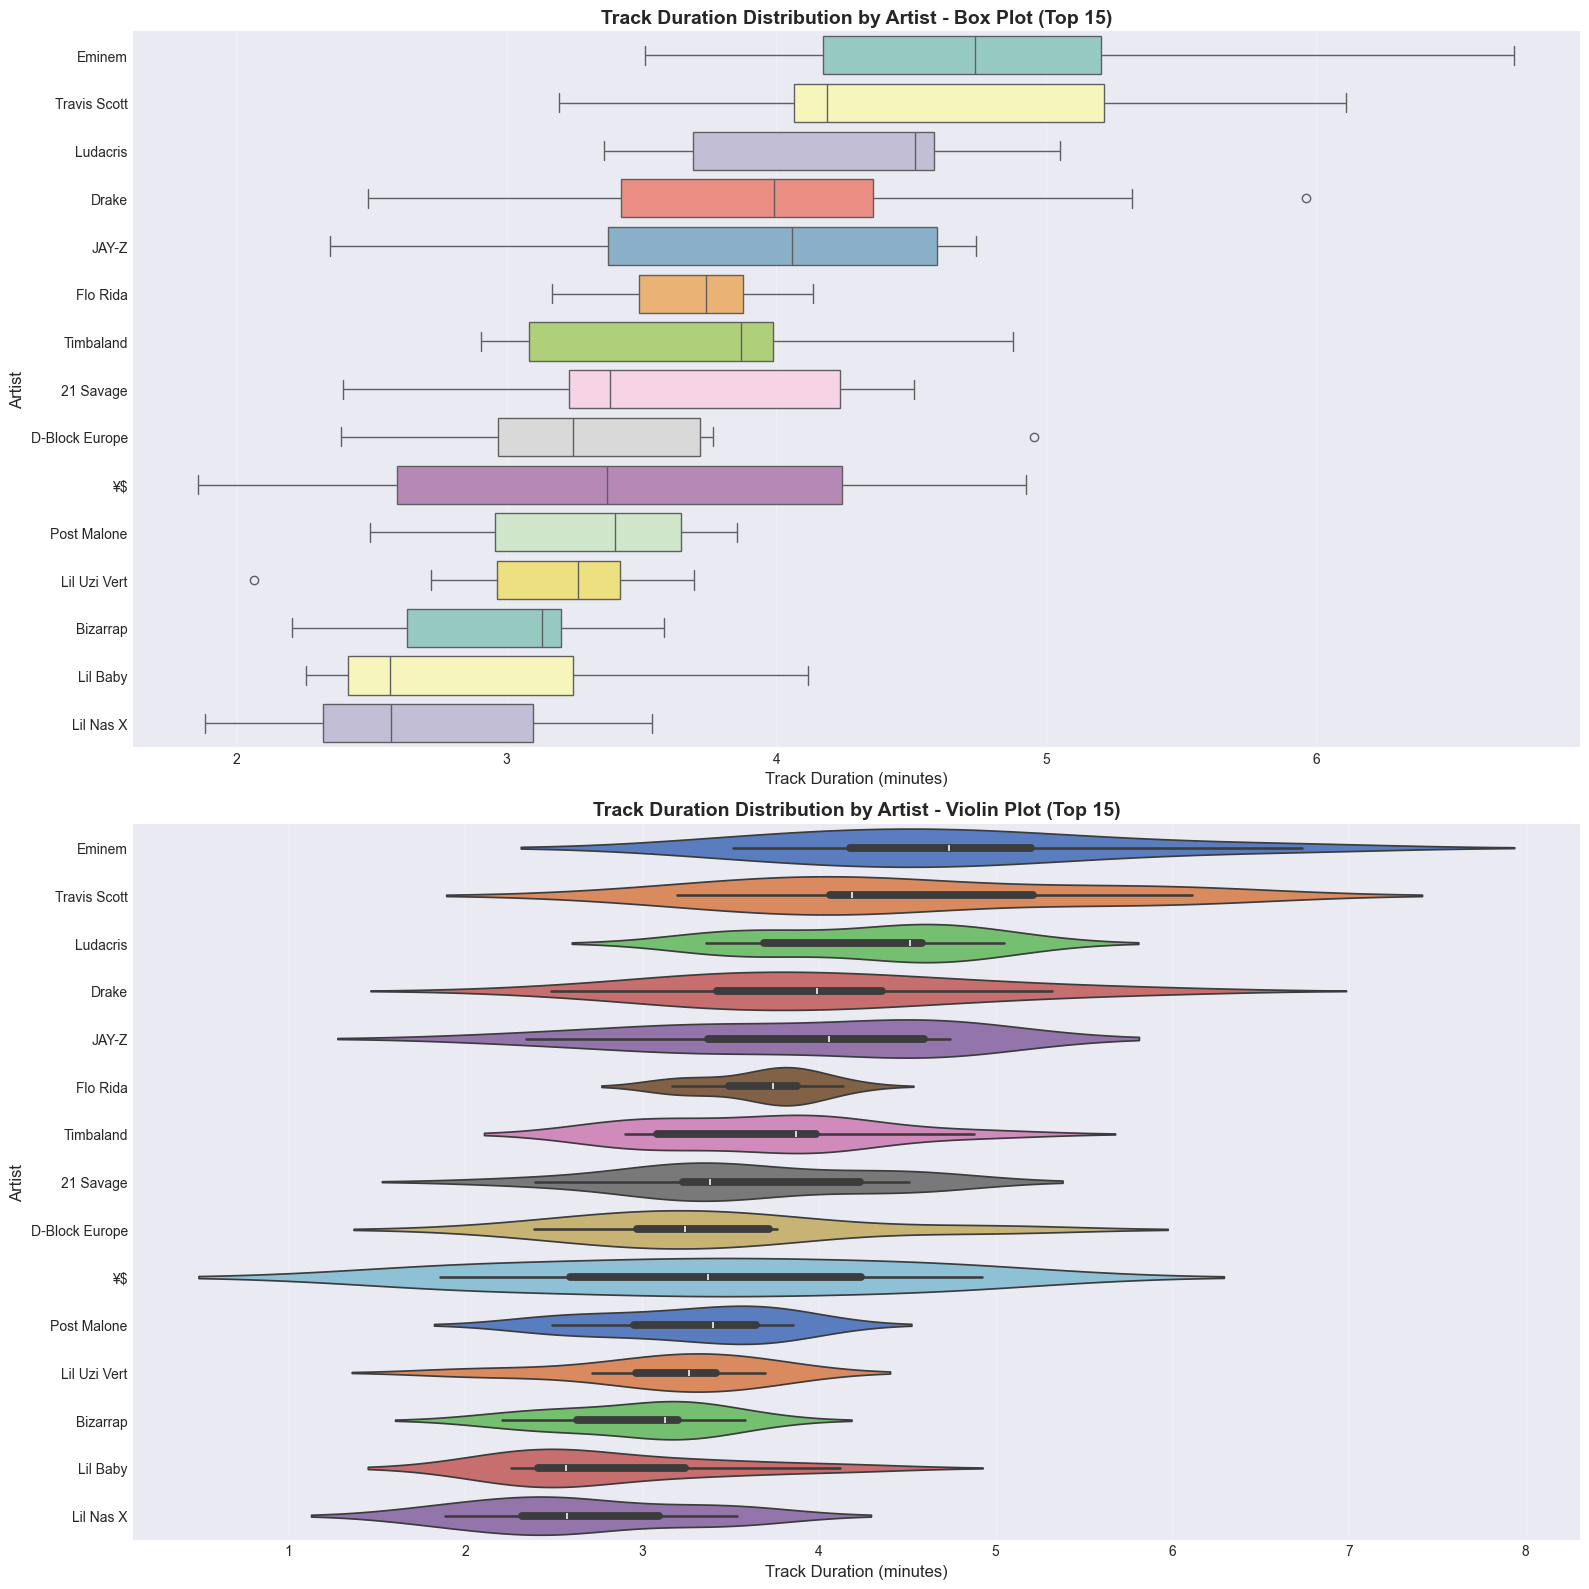


=== ANOVA Test Results ===
F-statistic: 6.4467
P-value: 8.9705e-10

Conclusion: Duration DOES vary significantly across artists (p < 0.05)


In [26]:
# Visualize with box plot and violin plot
fig, axes = plt.subplots(2, 1, figsize=(16, 16))

# Box plot
df_top_15_sorted = df_top_15.copy()
artist_order = duration_stats.index.tolist()

sns.boxplot(data=df_top_15_sorted, y='Artist', x='Duration_min', 
            order=artist_order, palette='Set3', ax=axes[0])
axes[0].set_xlabel('Track Duration (minutes)', fontsize=12)
axes[0].set_ylabel('Artist', fontsize=12)
axes[0].set_title('Track Duration Distribution by Artist - Box Plot (Top 15)', 
                  fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Violin plot
sns.violinplot(data=df_top_15_sorted, y='Artist', x='Duration_min',
               order=artist_order, palette='muted', ax=axes[1])
axes[1].set_xlabel('Track Duration (minutes)', fontsize=12)
axes[1].set_ylabel('Artist', fontsize=12)
axes[1].set_title('Track Duration Distribution by Artist - Violin Plot (Top 15)', 
                  fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Statistical test - ANOVA
from scipy.stats import f_oneway

artist_groups = [group['Duration_min'].values for name, group in df_top_15.groupby('Artist')]
f_stat, p_value = f_oneway(*artist_groups)

print(f"\n=== ANOVA Test Results ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4e}")
if p_value < 0.05:
    print("\nConclusion: Duration DOES vary significantly across artists (p < 0.05)")
else:
    print("\nConclusion: Duration does NOT vary significantly across artists (p >= 0.05)")

## 11. Question 10: Popularity Distribution Across Artists

In [27]:
# Analyze popularity distribution by artist
print("\n=== Popularity Statistics by Artist (Top 15) ===")
popularity_stats = df_top_15.groupby('Artist')['Popularity'].agg(['mean', 'std', 'min', 'max', 'count']).round(2)
popularity_stats = popularity_stats.sort_values('mean', ascending=False)
print(popularity_stats)


=== Popularity Statistics by Artist (Top 15) ===
                mean   std  min  max  count
Artist                                     
Travis Scott   86.56  5.73   77   93      9
¥$             85.10  4.84   80   96     10
Post Malone    85.00  1.69   83   88      8
21 Savage      83.80  6.09   73   96     10
Eminem         83.64  8.98   58   90     11
Bizarrap       83.00  4.75   77   92      8
Drake          82.88  6.82   65   92     17
Lil Uzi Vert   79.25  3.69   75   84      8
Flo Rida       78.00  5.54   68   84     10
JAY-Z          77.90  5.47   69   86     10
Lil Baby       76.67 11.83   47   85      9
Lil Nas X      75.90  4.38   68   81     10
Timbaland      69.00  8.68   58   85     10
D-Block Europe 67.88  4.09   60   74      8
Ludacris       63.00  3.83   53   67     10


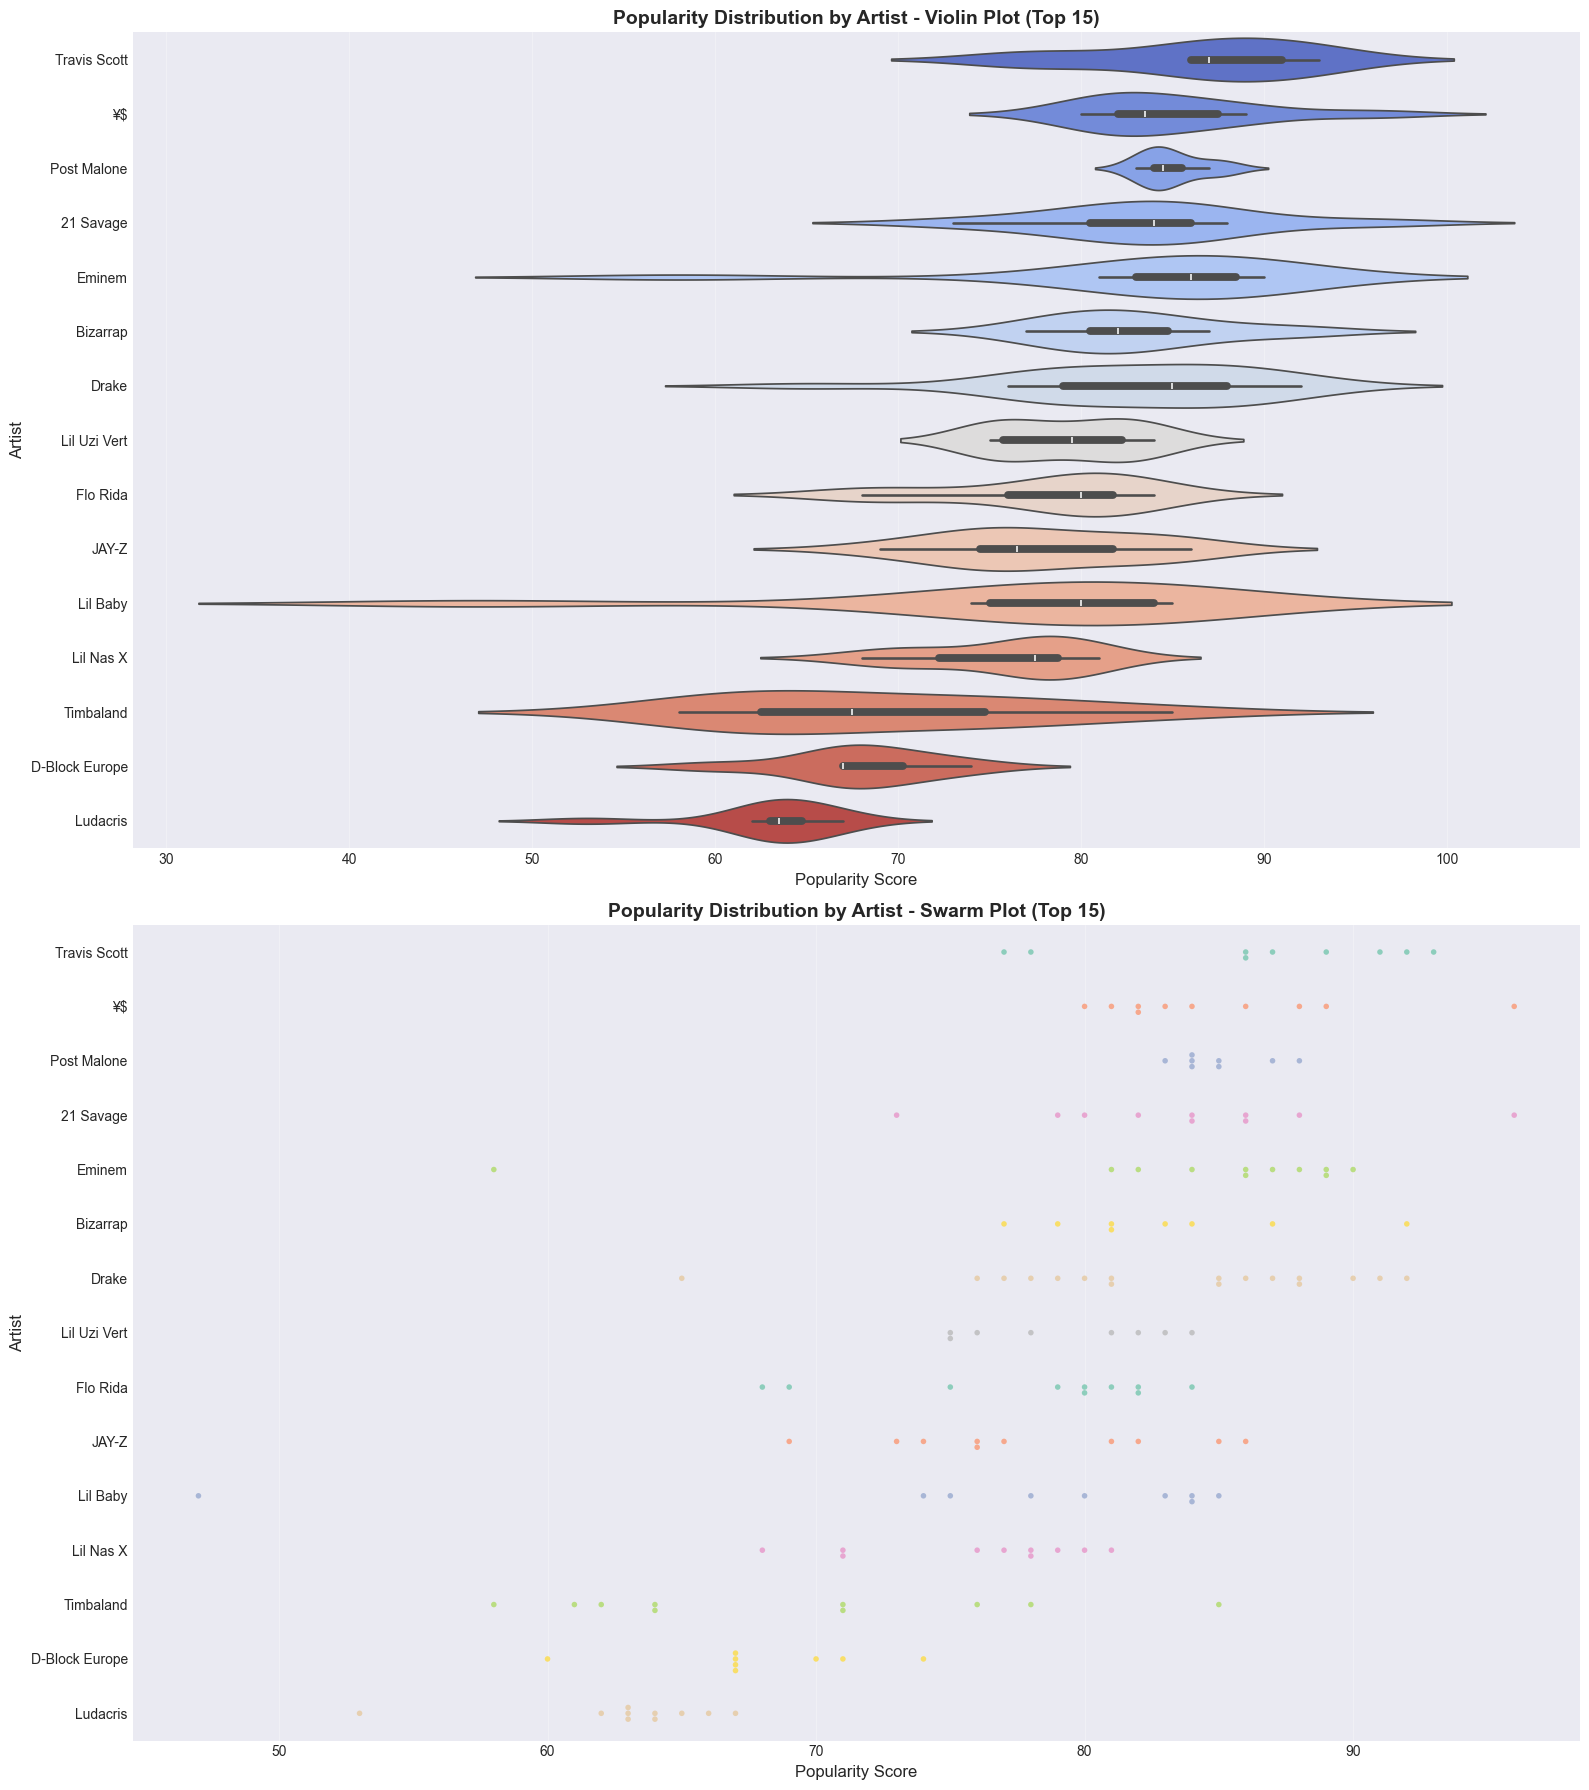

In [28]:
# Visualize with swarm plot and violin plot
fig, axes = plt.subplots(2, 1, figsize=(16, 18))

# Violin plot
artist_order_pop = popularity_stats.index.tolist()

sns.violinplot(data=df_top_15, y='Artist', x='Popularity',
               order=artist_order_pop, palette='coolwarm', ax=axes[0])
axes[0].set_xlabel('Popularity Score', fontsize=12)
axes[0].set_ylabel('Artist', fontsize=12)
axes[0].set_title('Popularity Distribution by Artist - Violin Plot (Top 15)', 
                  fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Swarm plot (if dataset is not too large)
if len(df_top_15) < 500:  # Only create swarm plot for smaller datasets
    sns.swarmplot(data=df_top_15, y='Artist', x='Popularity',
                  order=artist_order_pop, palette='Set2', 
                  size=4, ax=axes[1], alpha=0.7)
    axes[1].set_xlabel('Popularity Score', fontsize=12)
    axes[1].set_ylabel('Artist', fontsize=12)
    axes[1].set_title('Popularity Distribution by Artist - Swarm Plot (Top 15)', 
                      fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='x')
else:
    # Use strip plot for larger datasets
    sns.stripplot(data=df_top_15, y='Artist', x='Popularity',
                  order=artist_order_pop, palette='Set2',
                  size=3, ax=axes[1], alpha=0.6, jitter=True)
    axes[1].set_xlabel('Popularity Score', fontsize=12)
    axes[1].set_ylabel('Artist', fontsize=12)
    axes[1].set_title('Popularity Distribution by Artist - Strip Plot (Top 15)', 
                      fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

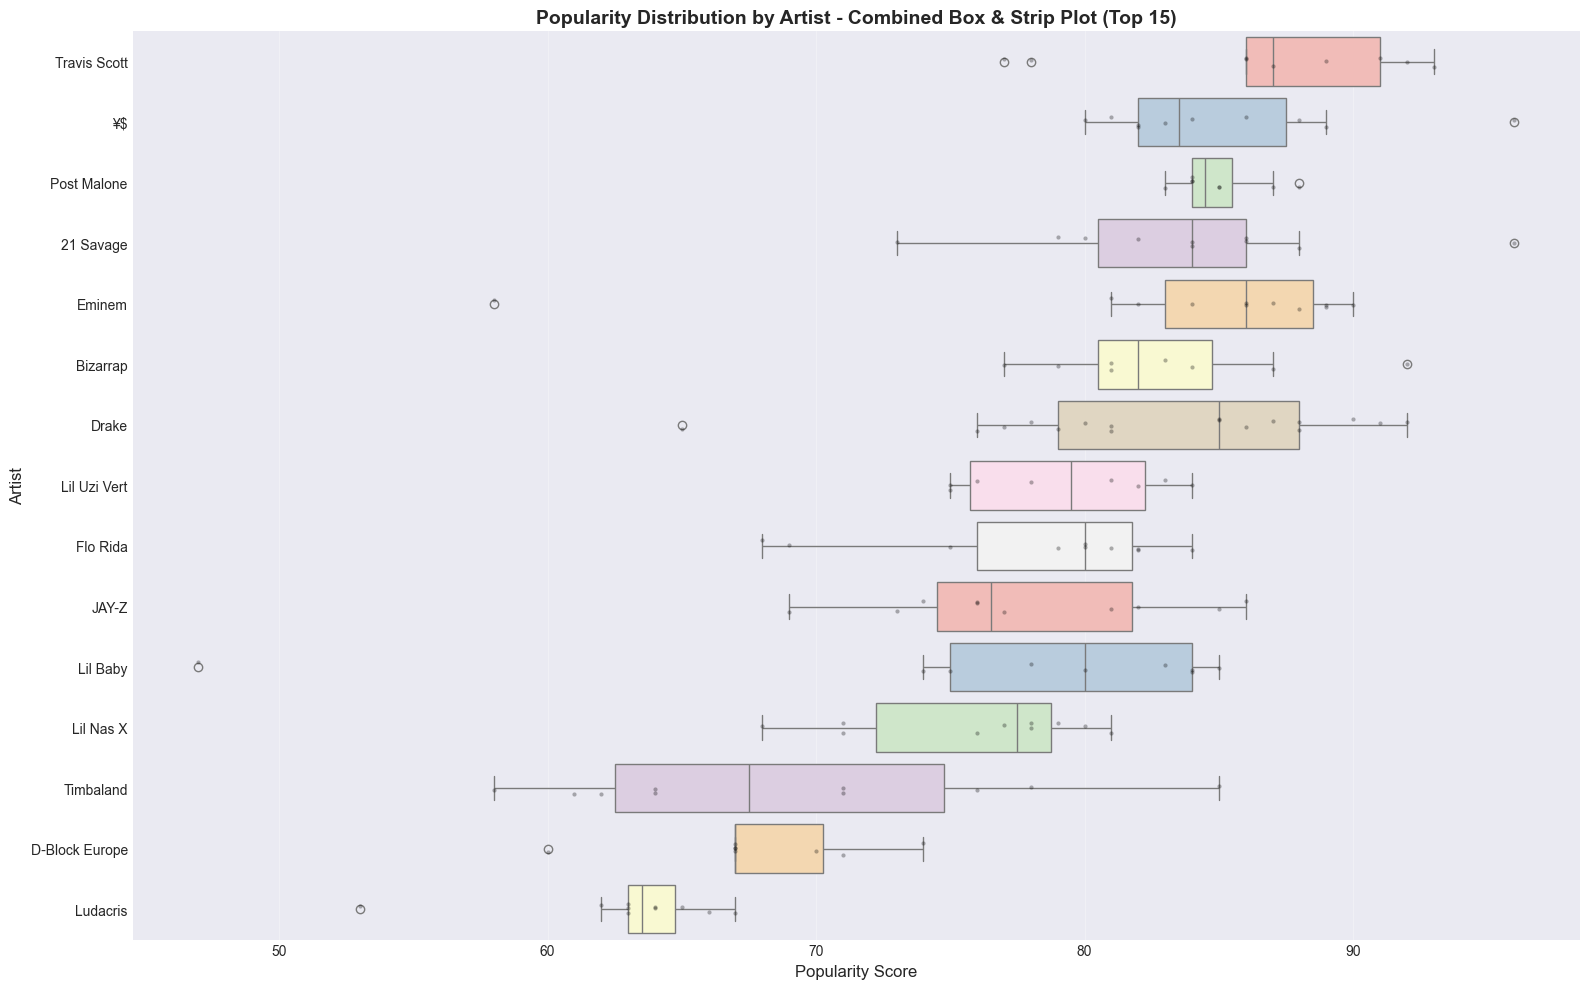


=== ANOVA Test Results (Popularity) ===
F-statistic: 11.8477
P-value: 2.1215e-17

Conclusion: Popularity DOES vary significantly across artists (p < 0.05)


In [29]:
# Additional visualization - Box plot with points
plt.figure(figsize=(16, 10))
sns.boxplot(data=df_top_15, y='Artist', x='Popularity',
            order=artist_order_pop, palette='Pastel1')
sns.stripplot(data=df_top_15, y='Artist', x='Popularity',
              order=artist_order_pop, color='black', 
              size=3, alpha=0.3, jitter=True)
plt.xlabel('Popularity Score', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.title('Popularity Distribution by Artist - Combined Box & Strip Plot (Top 15)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Statistical test - ANOVA for popularity
popularity_groups = [group['Popularity'].values for name, group in df_top_15.groupby('Artist')]
f_stat_pop, p_value_pop = f_oneway(*popularity_groups)

print(f"\n=== ANOVA Test Results (Popularity) ===")
print(f"F-statistic: {f_stat_pop:.4f}")
print(f"P-value: {p_value_pop:.4e}")
if p_value_pop < 0.05:
    print("\nConclusion: Popularity DOES vary significantly across artists (p < 0.05)")
else:
    print("\nConclusion: Popularity does NOT vary significantly across artists (p >= 0.05)")

## 12. Additional Insights and Summary

In [30]:
# Generate comprehensive summary
summary = f"""
DATASET OVERVIEW:
- Total Tracks Analyzed: {len(df):,}
- Unique Artists: {df['Artist'].nunique()}
- Average Track Duration: {df['Duration_min'].mean():.2f} minutes
- Average Popularity Score: {df['Popularity'].mean():.2f}/100

KEY FINDINGS:

1. Data Quality:
   ✓ Dataset is clean with no missing values or duplicates after preprocessing
   ✓ All records have complete artist and track information

2. Popularity Analysis:
   - Popularity range: {df['Popularity'].min()} - {df['Popularity'].max()}
   - Median popularity: {df['Popularity'].median():.1f}
   - Distribution is {skew_interpretation}
   - Tracks with popularity > 70: {len(df[df['Popularity'] > 70])} ({len(df[df['Popularity'] > 70])/len(df)*100:.1f}%)

3. Artist Insights:
   - Most prolific artist: {artist_track_counts.index[0]} ({artist_track_counts.iloc[0]} tracks)
   - Most popular artist (avg): {top_5_artists.index[0]} ({top_5_artists['Avg_Popularity'].iloc[0]:.1f})
   - Average tracks per artist: {artist_track_counts.mean():.1f}

4. Track Duration:
   - Average duration: {df['Duration_min'].mean():.2f} minutes
   - Duration range: {df['Duration_min'].min():.2f} - {df['Duration_min'].max():.2f} minutes
   - Correlation with popularity: {correlation_pearson:.4f} ({strength} {direction})

5. Statistical Tests:
   - Duration varies across artists: {'Yes' if p_value < 0.05 else 'No'} (p={p_value:.4e})
   - Popularity varies across artists: {'Yes' if p_value_pop < 0.05 else 'No'} (p={p_value_pop:.4e})

INSIGHTS FOR ARTISTS & PRODUCERS:
✓ Optimal track duration appears to be around {df['Duration_min'].median():.1f} minutes
✓ Consistency in quality leads to higher average popularity
✓ Prolific artists don't necessarily have highest popularity
✓ Duration has {strength} impact on popularity

RECOMMENDATIONS:
1. Focus on quality over quantity for better average popularity
2. Track duration should align with genre standards (~{df['Duration_min'].mean():.1f} min for hip-hop)
3. Analyze top artists' strategies for consistency
4. Consider targeting popularity sweet spot of 60-80 range
"""

print(summary)
print("="*80)


DATASET OVERVIEW:
- Total Tracks Analyzed: 413
- Unique Artists: 115
- Average Track Duration: 3.44 minutes
- Average Popularity Score: 75.38/100

KEY FINDINGS:

1. Data Quality:
   ✓ Dataset is clean with no missing values or duplicates after preprocessing
   ✓ All records have complete artist and track information

2. Popularity Analysis:
   - Popularity range: 29 - 97
   - Median popularity: 76.0
   - Distribution is left-skewed (negatively skewed)
   - Tracks with popularity > 70: 300 (72.6%)

3. Artist Insights:
   - Most prolific artist: Drake (17 tracks)
   - Most popular artist (avg): Travis Scott (86.6)
   - Average tracks per artist: 3.6

4. Track Duration:
   - Average duration: 3.44 minutes
   - Duration range: 1.36 - 8.36 minutes
   - Correlation with popularity: 0.0390 (weak positive)

5. Statistical Tests:
   - Duration varies across artists: Yes (p=8.9705e-10)
   - Popularity varies across artists: Yes (p=2.1215e-17)

INSIGHTS FOR ARTISTS & PRODUCERS:
✓ Optimal track d

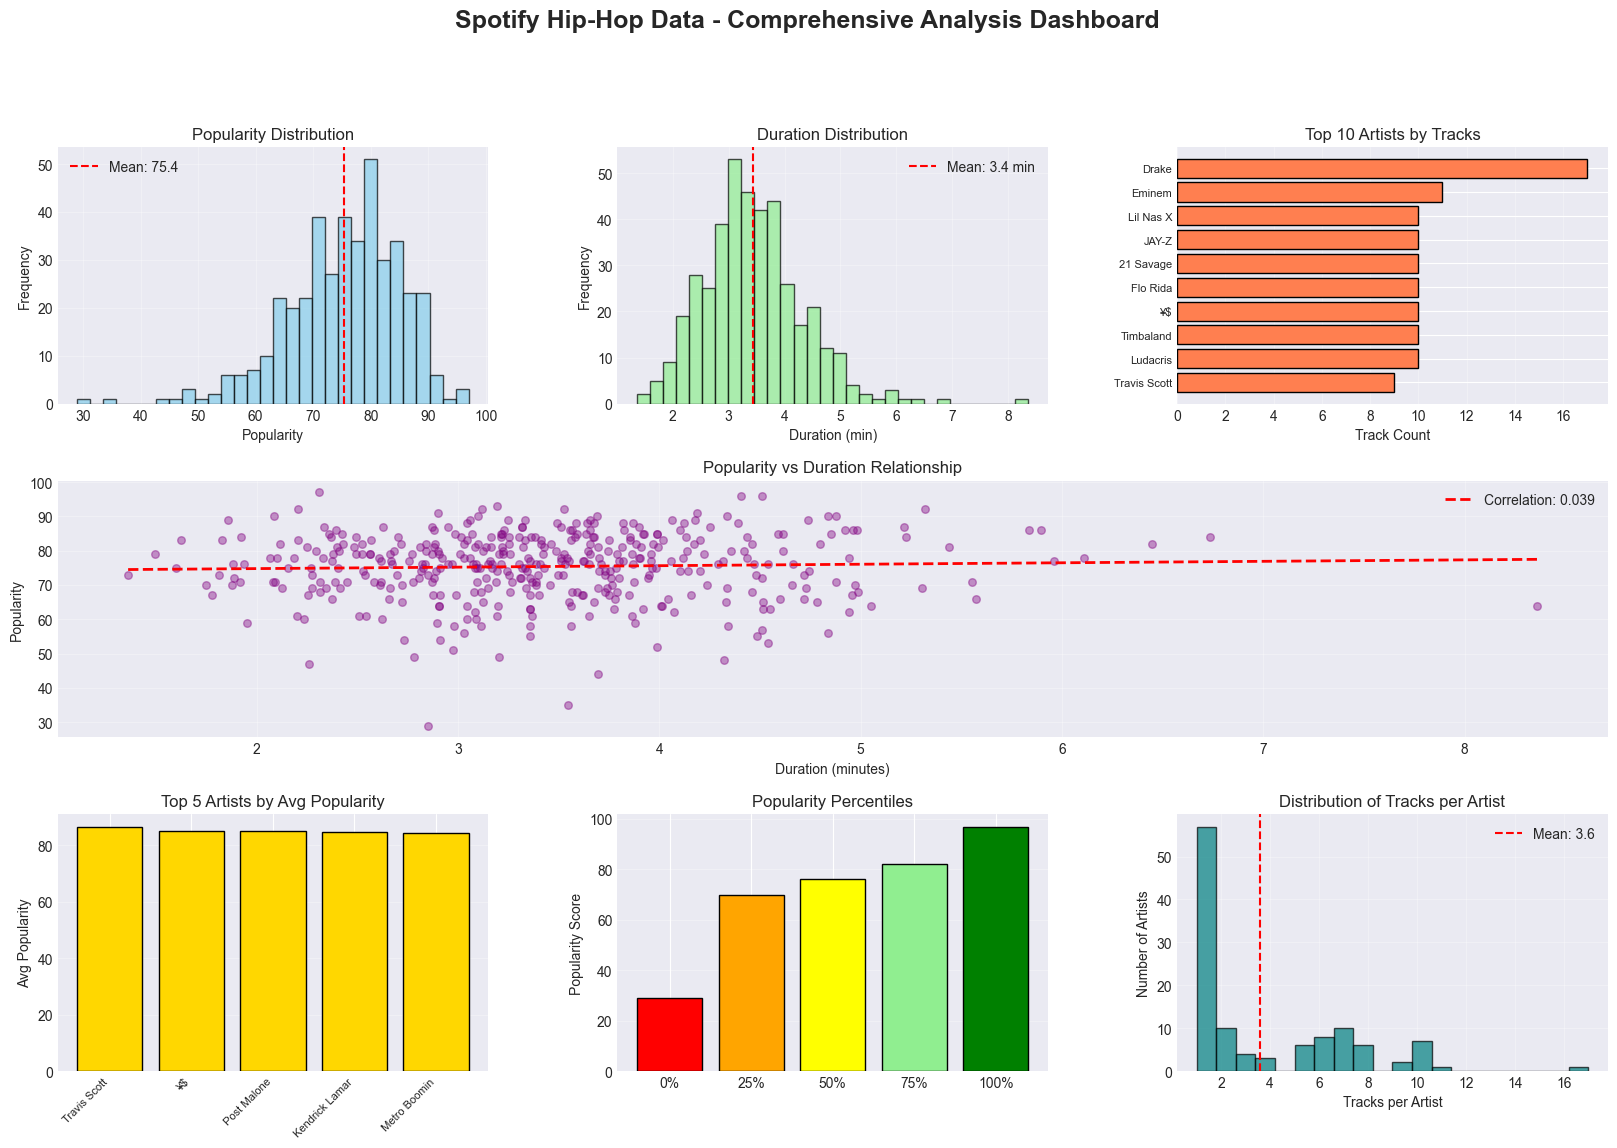


✓ Analysis Complete! All visualizations generated successfully.


In [31]:
# Final comprehensive visualization dashboard
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Popularity distribution
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(df['Popularity'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax1.axvline(df['Popularity'].mean(), color='red', linestyle='--', label=f'Mean: {df["Popularity"].mean():.1f}')
ax1.set_xlabel('Popularity')
ax1.set_ylabel('Frequency')
ax1.set_title('Popularity Distribution')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Duration distribution
ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(df['Duration_min'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
ax2.axvline(df['Duration_min'].mean(), color='red', linestyle='--', label=f'Mean: {df["Duration_min"].mean():.1f} min')
ax2.set_xlabel('Duration (min)')
ax2.set_ylabel('Frequency')
ax2.set_title('Duration Distribution')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Top artists by track count
ax3 = fig.add_subplot(gs[0, 2])
top_10 = artist_track_counts.head(10)
ax3.barh(range(len(top_10)), top_10.values, color='coral', edgecolor='black')
ax3.set_yticks(range(len(top_10)))
ax3.set_yticklabels(top_10.index, fontsize=8)
ax3.set_xlabel('Track Count')
ax3.set_title('Top 10 Artists by Tracks')
ax3.invert_yaxis()
ax3.grid(True, alpha=0.3, axis='x')

# 4. Popularity vs Duration scatter
ax4 = fig.add_subplot(gs[1, :])
ax4.scatter(df['Duration_min'], df['Popularity'], alpha=0.4, s=30, c='purple')
z = np.polyfit(df['Duration_min'], df['Popularity'], 1)
p = np.poly1d(z)
ax4.plot(df['Duration_min'].sort_values(), p(df['Duration_min'].sort_values()), 
         "r--", linewidth=2, label=f'Correlation: {correlation_pearson:.3f}')
ax4.set_xlabel('Duration (minutes)')
ax4.set_ylabel('Popularity')
ax4.set_title('Popularity vs Duration Relationship')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Top 5 artists comparison
ax5 = fig.add_subplot(gs[2, 0])
top_5_pop = top_5_artists['Avg_Popularity']
ax5.bar(range(len(top_5_pop)), top_5_pop.values, color='gold', edgecolor='black')
ax5.set_xticks(range(len(top_5_pop)))
ax5.set_xticklabels([name[:15] for name in top_5_pop.index], rotation=45, ha='right', fontsize=8)
ax5.set_ylabel('Avg Popularity')
ax5.set_title('Top 5 Artists by Avg Popularity')
ax5.grid(True, alpha=0.3, axis='y')

# 6. Popularity by percentile
ax6 = fig.add_subplot(gs[2, 1])
percentiles = [0, 25, 50, 75, 100]
percentile_values = [df['Popularity'].quantile(p/100) for p in percentiles]
ax6.bar(range(len(percentiles)), percentile_values, color=['red', 'orange', 'yellow', 'lightgreen', 'green'], edgecolor='black')
ax6.set_xticks(range(len(percentiles)))
ax6.set_xticklabels([f'{p}%' for p in percentiles])
ax6.set_ylabel('Popularity Score')
ax6.set_title('Popularity Percentiles')
ax6.grid(True, alpha=0.3, axis='y')

# 7. Track count distribution
ax7 = fig.add_subplot(gs[2, 2])
ax7.hist(artist_track_counts.values, bins=20, color='teal', edgecolor='black', alpha=0.7)
ax7.axvline(artist_track_counts.mean(), color='red', linestyle='--', 
            label=f'Mean: {artist_track_counts.mean():.1f}')
ax7.set_xlabel('Tracks per Artist')
ax7.set_ylabel('Number of Artists')
ax7.set_title('Distribution of Tracks per Artist')
ax7.legend()
ax7.grid(True, alpha=0.3)

fig.suptitle('Spotify Hip-Hop Data - Comprehensive Analysis Dashboard', 
             fontsize=18, fontweight='bold', y=0.995)
plt.show()

print("\n✓ Analysis Complete! All visualizations generated successfully.")